#### 样本特征值（像元值）提取

In [1]:
import geopandas as gpd
import rasterio as rio
from rasterio import mask
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path_sample_water = 'data/Section-7/sample_water.gpkg'
path_sample_land = 'data/Section-7/sample_land.gpkg'
path_rsimg = 'data/Section-7/s2_kunming_chenggong_6bands_20m.tif'


In [13]:
## 读入矢量数据
sam_wat = gpd.read_file(path_sample_water)
sam_land = gpd.read_file(path_sample_land)
print(sam_land.crs)
sam_wat.head()


PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]


,geometry
0,"MULTIPOLYGON (((273696.476 2750969.838, 273687..."
1,"MULTIPOLYGON (((277442.692 2741336.036, 277418..."
2,"MULTIPOLYGON (((278249.980 2736828.679, 278208..."
3,"MULTIPOLYGON (((282840.178 2742622.581, 282823..."
4,"MULTIPOLYGON (((281225.881 2747443.235, 281223..."


In [14]:
## 读入栅格数据
rsimg_rio = rio.open(path_rsimg)
rsimg_rio.meta


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1497,
 'height': 1611,
 'count': 6,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(20.0, 0.0, 268180.0,
        0.0, -20.0, 2765440.0)}

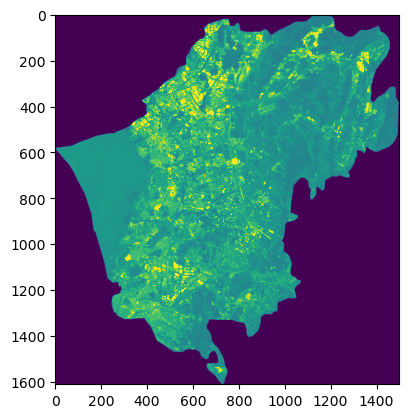

In [15]:
plt.imshow(rsimg_rio.read(1), vmax=3000)


利用roi矢量数据提取样本特征（影像各波段值）。

In [16]:
masked_img_wat, transform_masked_img_wat = mask.mask(
    rsimg_rio, 
    sam_wat.geometry,
    crop=True, 
    nodata=0
)


In [18]:
masked_img_land, transform_masked_img_land = mask.mask(
    rsimg_rio, 
    sam_land.geometry,
    crop=True, 
    nodata=0
)


(6, 1044, 1201)

(6, 1044, 1201)


(6, 256)

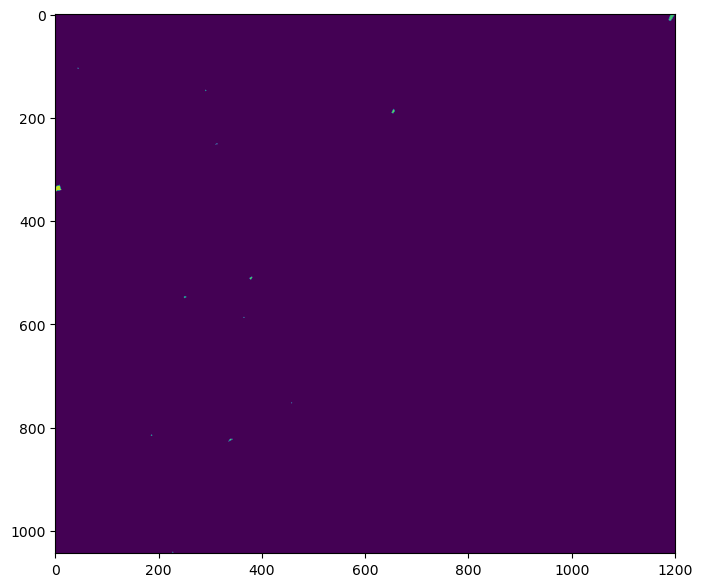

In [47]:
fig = plt.figure(figsize=(8,8))
plt.imshow(masked_img_wat[0])

In [55]:
### 水体样本提取
print(masked_img_wat.shape)
ids_wat = np.where(masked_img_wat[0] != 0)
fea_wat = masked_img_wat[:,ids_wat[0], ids_wat[1]]
print('water fea:',fea_wat.shape)

(6, 1044, 1201)
water fea: (6, 256)


In [54]:
### 陆地样本提取
ids_land = np.where(masked_img_land[0] != 0)
fea_land = masked_img_land[:,ids_land[0], ids_land[1]]
print('land fea:', fea_land.shape)


land fea: (6, 224)


In [59]:
### 样本特征合并
feas = np.concatenate([fea_wat, fea_land], axis=1) 
feas_ = feas.transpose(1,0)
feas_.shape



(480, 6)

In [60]:
### 样本标签制作
label_wat = np.full(shape=fea_wat.shape[1], fill_value=0)
label_land = np.full(shape=fea_land.shape[1], fill_value=1)
labels = np.concatenate([label_wat, label_land])
labels = labels[:,np.newaxis]
labels.shape


(480, 1)

In [61]:
### 样本特征和标签合并
sams = np.concatenate([feas_, labels], axis=1)
sams.shape


(480, 7)

In [ ]:
# path_numpy = 'data/Section-7/sams_array.npy'
# np.save(path_numpy, sams)

